In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
bank = pd .read_csv('bank-marketing.csv')

In [3]:
bank.isnull().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [4]:
bank.shape

(45211, 23)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
bank.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
bank

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,yes,no,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,yes,no,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,yes,no,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,telephone,17,nov,508,4,-1,0,unknown,no,0


In [8]:
bank.columns


Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [9]:
bank.drop('marital-education',axis=1, inplace=True)

In [10]:
boolean_columns=[ 'targeted','default','loan','housing']

encode={'yes':1,
       'no':0,}

for col in boolean_columns:
    bank[col]=bank[col].apply(lambda x : encode[x])

In [11]:
boolean_columns=[ 'eligible']

encode={'Y':1,
       'N':0,}

for col in boolean_columns:
    bank[col]=bank[col].apply(lambda x : encode[x])

In [12]:
df=pd.get_dummies(bank[['job','marital']])

In [13]:
df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [14]:
bank=pd.concat([bank,df],axis=1)

In [15]:
bank.head()

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,5,1,management,100000,married,tertiary,1,0,2143,...,0,0,0,0,0,0,0,0,1,0
1,44,4,1,technician,60000,single,secondary,1,0,29,...,0,0,0,0,1,0,0,0,0,1
2,33,3,1,entrepreneur,120000,married,secondary,1,0,2,...,0,0,0,0,0,0,0,0,1,0
3,47,4,1,blue-collar,20000,married,unknown,0,0,1506,...,0,0,0,0,0,0,0,0,1,0
4,33,3,1,unknown,0,single,unknown,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [16]:
bank.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'response', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [17]:
bank.drop('job',axis=1,inplace=True)

In [18]:
bank.drop('marital',axis=1,inplace=True)

In [19]:
bank.drop('age group',axis=1,inplace=True)

In [20]:
bank.drop('education',axis=1,inplace=True)

In [21]:
bank.drop('pdays',axis=1,inplace=True)

In [22]:
bank.drop('y',axis=1,inplace=True)

In [23]:
bank.drop('contact',axis=1,inplace=True)

In [24]:
bank.drop('month',axis=1,inplace=True)

In [25]:
bank.drop('day',axis=1,inplace=True)

In [26]:
bank.drop('poutcome',axis=1,inplace=True)

In [27]:
bank.head()

,age,eligible,salary,targeted,default,balance,housing,loan,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,1,100000,1,0,2143,1,0,261,1,...,0,0,0,0,0,0,0,0,1,0
1,44,1,60000,1,0,29,1,0,151,1,...,0,0,0,0,1,0,0,0,0,1
2,33,1,120000,1,0,2,1,1,76,1,...,0,0,0,0,0,0,0,0,1,0
3,47,1,20000,0,0,1506,1,0,92,1,...,0,0,0,0,0,0,0,0,1,0
4,33,1,0,0,0,1,0,0,198,1,...,0,0,0,0,0,0,1,0,0,1


In [28]:
bank.columns

Index(['age', 'eligible', 'salary', 'targeted', 'default', 'balance',
       'housing', 'loan', 'duration', 'campaign', 'previous', 'response',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [29]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   eligible           45211 non-null  int64
 2   salary             45211 non-null  int64
 3   targeted           45211 non-null  int64
 4   default            45211 non-null  int64
 5   balance            45211 non-null  int64
 6   housing            45211 non-null  int64
 7   loan               45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  previous           45211 non-null  int64
 11  response           45211 non-null  int64
 12  job_admin.         45211 non-null  uint8
 13  job_blue-collar    45211 non-null  uint8
 14  job_entrepreneur   45211 non-null  uint8
 15  job_housemaid      45211 non-null  uint8
 16  job_management     45211 non-null  uint8
 17  job_retired 

In [30]:
x_bank=bank.drop(['response'],axis=1)

In [31]:
x=x_bank


In [32]:
x

,age,eligible,salary,targeted,default,balance,housing,loan,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,1,100000,1,0,2143,1,0,261,1,...,0,0,0,0,0,0,0,0,1,0
1,44,1,60000,1,0,29,1,0,151,1,...,0,0,0,0,1,0,0,0,0,1
2,33,1,120000,1,0,2,1,1,76,1,...,0,0,0,0,0,0,0,0,1,0
3,47,1,20000,0,0,1506,1,0,92,1,...,0,0,0,0,0,0,0,0,1,0
4,33,1,0,0,0,1,0,0,198,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,60000,1,0,825,0,0,977,3,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,55000,1,0,1729,0,0,456,2,...,1,0,0,0,0,0,0,1,0,0
45208,72,0,55000,1,0,5715,0,0,1127,5,...,1,0,0,0,0,0,0,0,1,0
45209,57,1,20000,1,0,668,0,0,508,4,...,0,0,0,0,0,0,0,0,1,0


In [33]:
y=bank.response

In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response, Length: 45211, dtype: int64

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit( x , y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[0.14266207 0.01876628 0.01329632 0.01628242 0.00375244 0.1531338
 0.0186495  0.01713756 0.33131946 0.0781355  0.08033033 0.01153251
 0.00961968 0.0046547  0.00565795 0.01180676 0.00534441 0.00773512
 0.00922735 0.0071661  0.01372067 0.00590191 0.00210779 0.00985179
 0.01126347 0.01094411]


<AxesSubplot:>

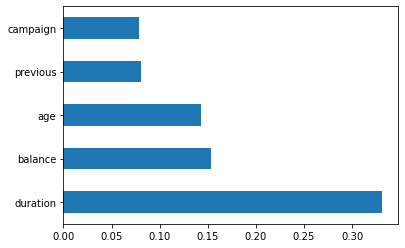

In [43]:
feature_imp=pd.Series(model.feature_importances_, index=x.columns)
feature_imp.nlargest(5).plot(kind='barh')

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [63]:
x_train.shape

(36168, 26)

In [64]:
y_train.shape

(36168,)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rfr=RandomForestRegressor(n_estimators=20, random_state=0)

In [90]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [91]:
prediction=rfr.predict(x_test)

<AxesSubplot:xlabel='response', ylabel='Density'>

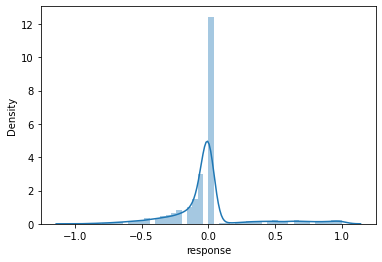

In [92]:
sns.distplot(y_test-prediction)

In [93]:
from sklearn import metrics


In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.15351100298573486
MSE: 0.082708724980648
RMSE: 0.28759124635608785


In [104]:
for i in range(len(prediction)):
    if prediction[i] < 0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1
    
prediction =prediction.astype("int64")

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pd.Series(prediction)))
print(accuracy_score(y_test,pd.Series(prediction)))
print(classification_report(y_test,pd.Series(prediction)))

[[7598  354]
 [ 659  432]]
0.8879796527700984
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.55      0.40      0.46      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.68      0.70      9043
weighted avg       0.88      0.89      0.88      9043



In [99]:
for i in range(len(prediction)):
    if prediction[i] < 0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1

In [102]:
type(prediction[0])

numpy.float64

In [97]:
y_test

22052    0
42082    1
23790    0
31081    0
1801     0
        ..
2100     0
24407    0
11910    0
32237    0
6229     0
Name: response, Length: 9043, dtype: int64